**Import Libraries**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")

**Load The dataset**

In [3]:
df=pd.read_excel('/content/withgenres.xlsx')
df.head()

,Unnamed: 0,Indeks,Track name,Radio,Band,Track,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,0,Music Genre
0,0,1,Illusion - Nóż,Antyradio,Illusion,Nóż,0.669,0.287,9,-9.814,...,131.162,audio_features,7gYcpDw2ocjqZO0QnaN4LR,spotify:track:7gYcpDw2ocjqZO0QnaN4LR,https://api.spotify.com/v1/tracks/7gYcpDw2ocjq...,https://api.spotify.com/v1/audio-analysis/7gYc...,352907,4,NaN,polish punk
1,1,2,Big Cyc - Ballada O Smutnym Skinie,Antyradio,Big Cyc,Ballada O Smutnym Skinie,0.407,0.816,0,-6.420,...,83.461,audio_features,4N0J7oRfz3tdnmXy10MbMr,spotify:track:4N0J7oRfz3tdnmXy10MbMr,https://api.spotify.com/v1/tracks/4N0J7oRfz3td...,https://api.spotify.com/v1/audio-analysis/4N0J...,201080,4,NaN,polish punk
2,2,3,Dr Misio - Hipster,Antyradio,Dr Misio,Hipster,0.571,0.923,4,-7.473,...,156.524,audio_features,1rD0BmlixRov9u1zPGFpZu,spotify:track:1rD0BmlixRov9u1zPGFpZu,https://api.spotify.com/v1/tracks/1rD0BmlixRov...,https://api.spotify.com/v1/audio-analysis/1rD0...,130333,4,NaN,polish alternative rock
3,3,4,Klaus Mitffoch - Jezu Jak Sie Ciesze,Antyradio,Klaus Mitffoch,Jezu Jak Sie Ciesze,0.201,0.832,6,-6.852,...,182.340,audio_features,1xFV9l6sDBIFPydlGp9Avq,spotify:track:1xFV9l6sDBIFPydlGp9Avq,https://api.spotify.com/v1/tracks/1xFV9l6sDBIF...,https://api.spotify.com/v1/audio-analysis/1xFV...,217060,3,NaN,classic polish pop
4,4,5,Daria Zawialow - Lwy,Antyradio,Daria Zawialow,Lwy,0.555,0.681,1,-11.893,...,143.941,audio_features,7xgSKL47i4z9LwaEQpIYhL,spotify:track:7xgSKL47i4z9LwaEQpIYhL,https://api.spotify.com/v1/tracks/7xgSKL47i4z9...,https://api.spotify.com/v1/audio-analysis/7xgS...,289304,4,NaN,polish alternative


**Data Preprocessing**

In [4]:
#drop the first feature this is just a serial number
df=df.drop(['Unnamed: 0',0],axis=1)

In [5]:
#head of the dataset
df.head()

,Indeks,Track name,Radio,Band,Track,danceability,energy,key,loudness,mode,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Music Genre
0,1,Illusion - Nóż,Antyradio,Illusion,Nóż,0.669,0.287,9,-9.814,1,...,0.254,131.162,audio_features,7gYcpDw2ocjqZO0QnaN4LR,spotify:track:7gYcpDw2ocjqZO0QnaN4LR,https://api.spotify.com/v1/tracks/7gYcpDw2ocjq...,https://api.spotify.com/v1/audio-analysis/7gYc...,352907,4,polish punk
1,2,Big Cyc - Ballada O Smutnym Skinie,Antyradio,Big Cyc,Ballada O Smutnym Skinie,0.407,0.816,0,-6.420,0,...,0.580,83.461,audio_features,4N0J7oRfz3tdnmXy10MbMr,spotify:track:4N0J7oRfz3tdnmXy10MbMr,https://api.spotify.com/v1/tracks/4N0J7oRfz3td...,https://api.spotify.com/v1/audio-analysis/4N0J...,201080,4,polish punk
2,3,Dr Misio - Hipster,Antyradio,Dr Misio,Hipster,0.571,0.923,4,-7.473,0,...,0.909,156.524,audio_features,1rD0BmlixRov9u1zPGFpZu,spotify:track:1rD0BmlixRov9u1zPGFpZu,https://api.spotify.com/v1/tracks/1rD0BmlixRov...,https://api.spotify.com/v1/audio-analysis/1rD0...,130333,4,polish alternative rock
3,4,Klaus Mitffoch - Jezu Jak Sie Ciesze,Antyradio,Klaus Mitffoch,Jezu Jak Sie Ciesze,0.201,0.832,6,-6.852,0,...,0.311,182.340,audio_features,1xFV9l6sDBIFPydlGp9Avq,spotify:track:1xFV9l6sDBIFPydlGp9Avq,https://api.spotify.com/v1/tracks/1xFV9l6sDBIF...,https://api.spotify.com/v1/audio-analysis/1xFV...,217060,3,classic polish pop
4,5,Daria Zawialow - Lwy,Antyradio,Daria Zawialow,Lwy,0.555,0.681,1,-11.893,0,...,0.612,143.941,audio_features,7xgSKL47i4z9LwaEQpIYhL,spotify:track:7xgSKL47i4z9LwaEQpIYhL,https://api.spotify.com/v1/tracks/7xgSKL47i4z9...,https://api.spotify.com/v1/audio-analysis/7xgS...,289304,4,polish alternative


**Shape of dataset**

In [6]:
#shape of the dataset
df.shape

(2266, 24)

**Datatype of Features**

In [7]:
# datatye of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Indeks            2266 non-null   int64  
 1   Track name        2266 non-null   object 
 2   Radio             2266 non-null   object 
 3   Band              2266 non-null   object 
 4   Track             2266 non-null   object 
 5   danceability      2266 non-null   float64
 6   energy            2266 non-null   float64
 7   key               2266 non-null   int64  
 8   loudness          2266 non-null   float64
 9   mode              2266 non-null   int64  
 10  speechiness       2266 non-null   float64
 11  acousticness      2266 non-null   float64
 12  instrumentalness  2266 non-null   float64
 13  liveness          2266 non-null   float64
 14  valence           2266 non-null   float64
 15  tempo             2266 non-null   float64
 16  type              2266 non-null   object 


**Statistics Summary**

In [8]:
#mean median ,standard deviation, lower quartile,upper quartile of all numeric features using describe method
df.describe()

,Indeks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000
mean,1133.500000,0.602365,0.688269,5.431598,-7.228714,0.536187,0.068313,0.195595,0.078975,0.185841,0.520148,121.536353,232054.645190,3.958517
std,654.282177,0.150613,0.197746,3.549082,3.156021,0.498799,0.059782,0.257661,0.201769,0.155521,0.231603,26.545084,62433.500814,0.275649
min,1.000000,0.137000,0.030100,0.000000,-37.511000,0.000000,0.022400,0.000003,0.000000,0.014100,0.030500,59.561000,58987.000000,1.000000
25%,567.250000,0.502000,0.564250,2.000000,-8.682000,0.000000,0.035700,0.009505,0.000001,0.093725,0.345000,101.967000,193617.000000,4.000000
50%,1133.500000,0.613000,0.718000,6.000000,-6.666000,1.000000,0.047400,0.068500,0.000177,0.125000,0.523000,120.032500,220893.000000,4.000000
75%,1699.750000,0.718750,0.843000,9.000000,-5.021750,1.000000,0.072500,0.288000,0.013475,0.229000,0.702000,135.914250,257314.750000,4.000000
max,2266.000000,0.975000,0.995000,11.000000,-0.738000,1.000000,0.503000,0.993000,0.961000,0.989000,0.985000,213.146000,853200.000000,5.000000


In [9]:
#count,unique, top and frequency of all categorical features using describe method
df.describe(include = 'object').T

,count,unique,top,freq
Track name,2266,2260,Daniel Powter - Bad Day,2
Radio,2266,3,Antyradio,863
Band,2266,1554,T.love,13
Track,2266,2192,2022,11
type,2266,1,audio_features,2266
id,2266,2254,2LawezPeJhN4AWuSB0GtAU,2
uri,2266,2254,spotify:track:2LawezPeJhN4AWuSB0GtAU,2
track_href,2266,2254,https://api.spotify.com/v1/tracks/2LawezPeJhN4...,2
analysis_url,2266,2254,https://api.spotify.com/v1/audio-analysis/2Law...,2
Music Genre,1908,345,dance pop,159


**Missing Values**

In [10]:
#There is no missing values in the dataset except music genres
# we have option to fill these missing values or drop these null features.
#music genres is our predicted column so we need to drop the missing values rather then fill on most frequent values
df.isnull().sum()

Indeks                0
Track name            0
Radio                 0
Band                  0
Track                 0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
type                  0
id                    0
uri                   0
track_href            0
analysis_url          0
duration_ms           0
time_signature        0
Music Genre         358
dtype: int64

In [11]:
#drop missing values using dropna method and inplace=TRUE means change in original dataframe
df.dropna(inplace=True)

In [12]:
#now all the values are filled
df.isnull().sum()

Indeks              0
Track name          0
Radio               0
Band                0
Track               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
Music Genre         0
dtype: int64

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# **Data Visualization**

**Univariate Analaysis**

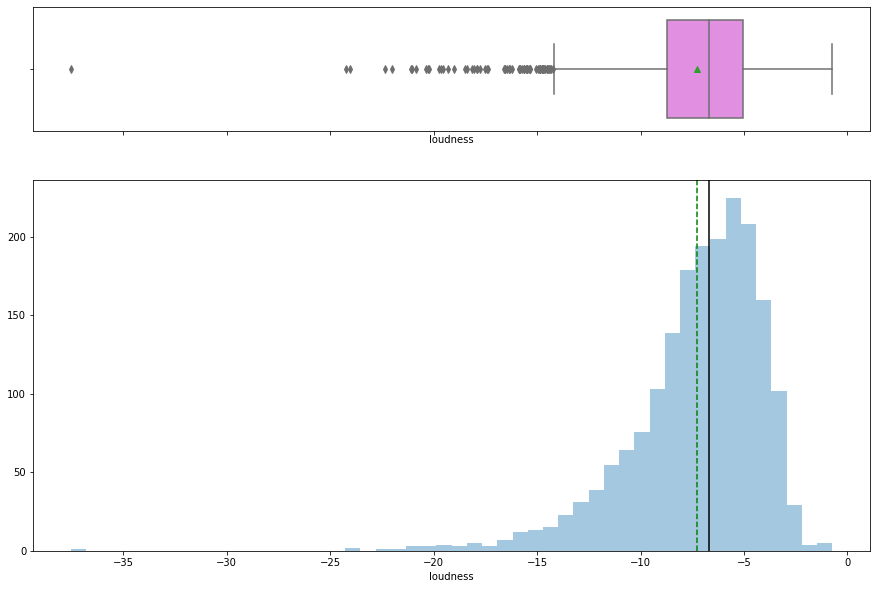

In [74]:
# Build the histogram boxplot for loudness
histogram_boxplot(df['loudness'])
#There re so many outliers in loudness and distribution is left skewed 
#box plot tell us the 5 number summary such as mean,mode,median,standard deviation etc

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


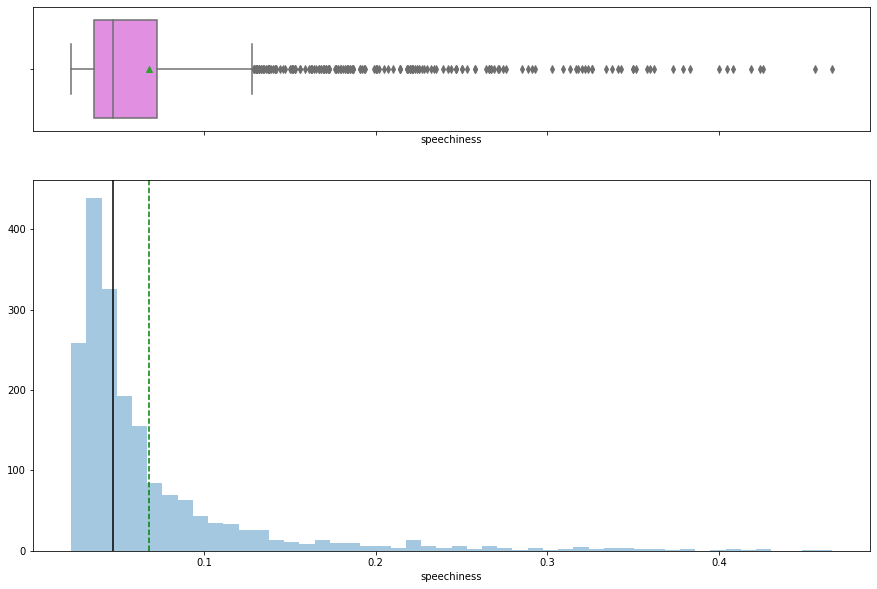

In [15]:
# Build the histogram boxplot for speechiness
histogram_boxplot(df['speechiness'])
#There re so many outliers in spechiness also greater than loudness you see the outliers in black dot and distribution is right skewed 
#box plot tell us the 5 number summary such as mean,mode,median,standard deviation etc

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


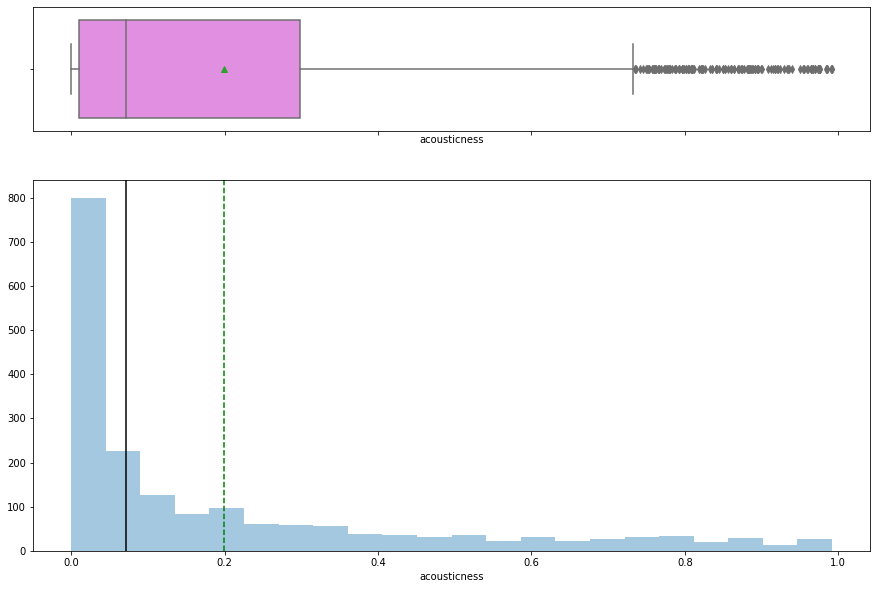

In [16]:

# Build the histogram boxplot for acousticness
histogram_boxplot(df['acousticness'])
#There re so many outliers in accousticness less than loudness and skeweness  you see the outliers in black dot and distribution is right skewed and spread of this column is very large because of width of box 
#box plot tell us the 5 number summary such as mean,mode,median,standard deviation etc

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


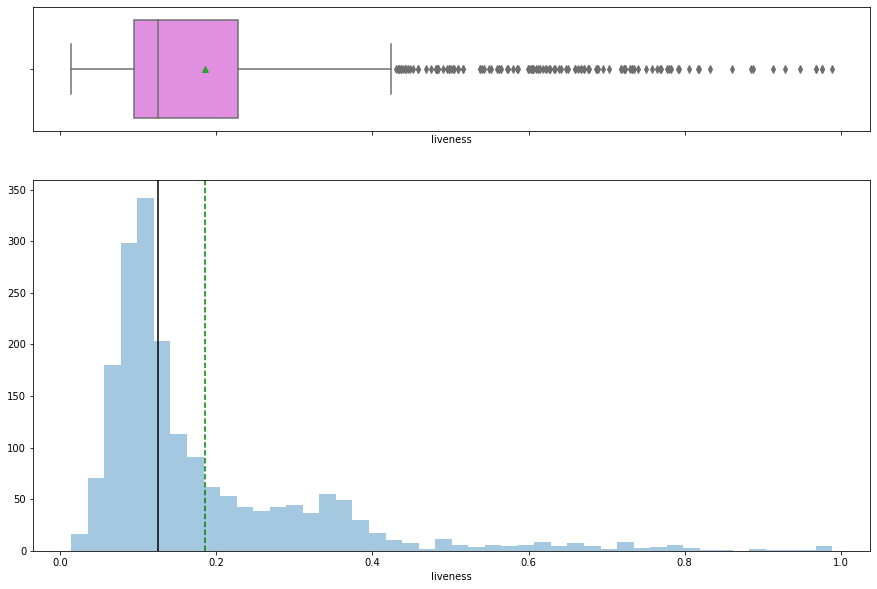

In [17]:

# Build the histogram boxplot for liveness
histogram_boxplot(df['liveness'])
#There re so many outliers in liveness also greater than loudness you see the outliers in black dot and distribution is right skewed 
#box plot tell us the 5 number summary such as mean,mode,median,standard deviation etc

**Barplot**

In [18]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)# rotate xticks 90 degreee for columns like brand and trackname
        
    plt.show() # show the plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


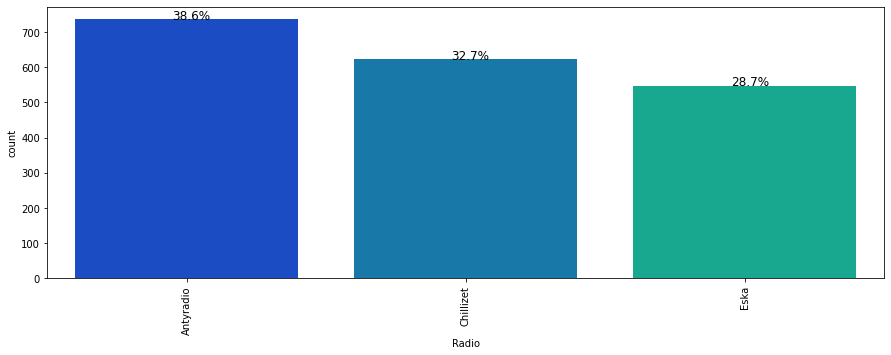

In [19]:
#Build barplot for Radio

plt.figure(figsize=(15,5))
ax = sns.countplot(df["Radio"],palette='winter')
perc_on_bar(ax,df["Radio"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


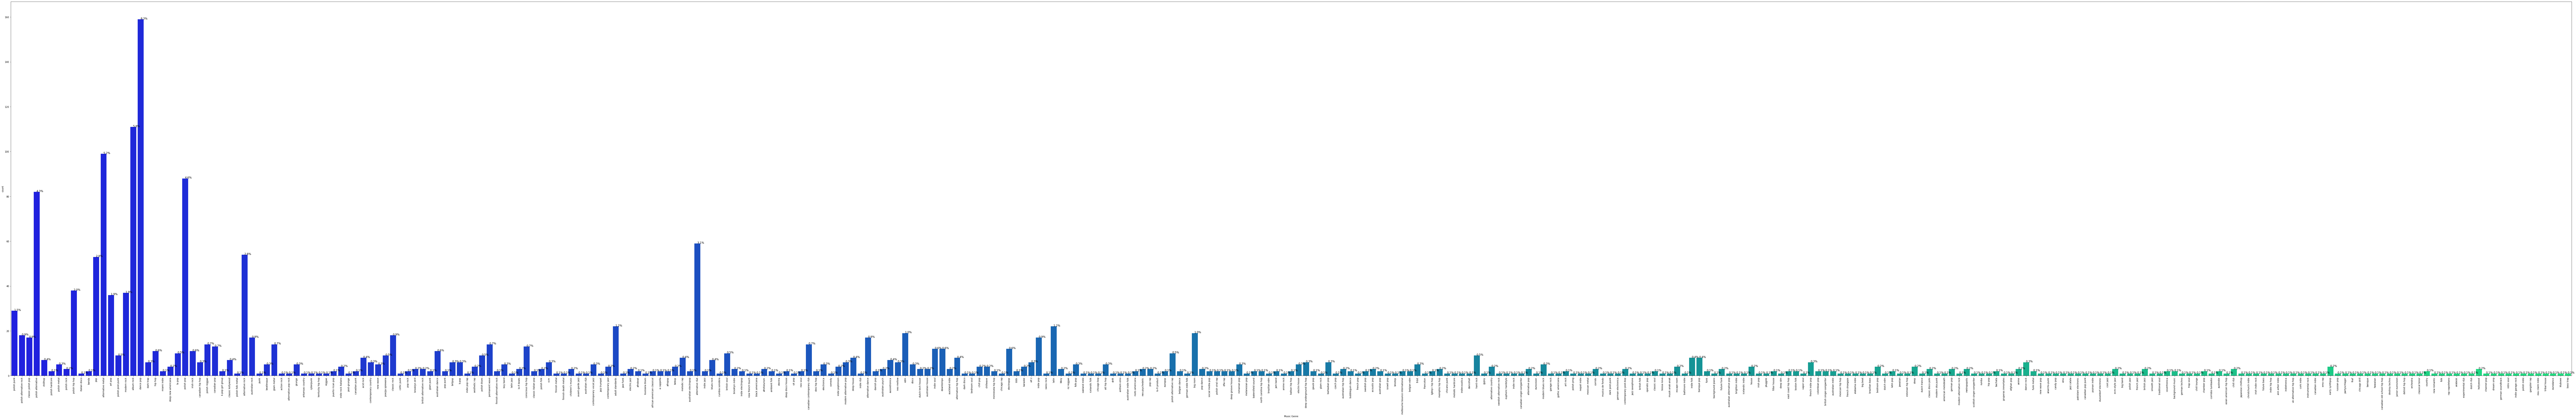

In [20]:
#Build barplot for Music Genre
#click below charts to look better
plt.figure(figsize=(200,30))
ax = sns.countplot(df["Music Genre"],palette='winter')
perc_on_bar(ax,df["Music Genre"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


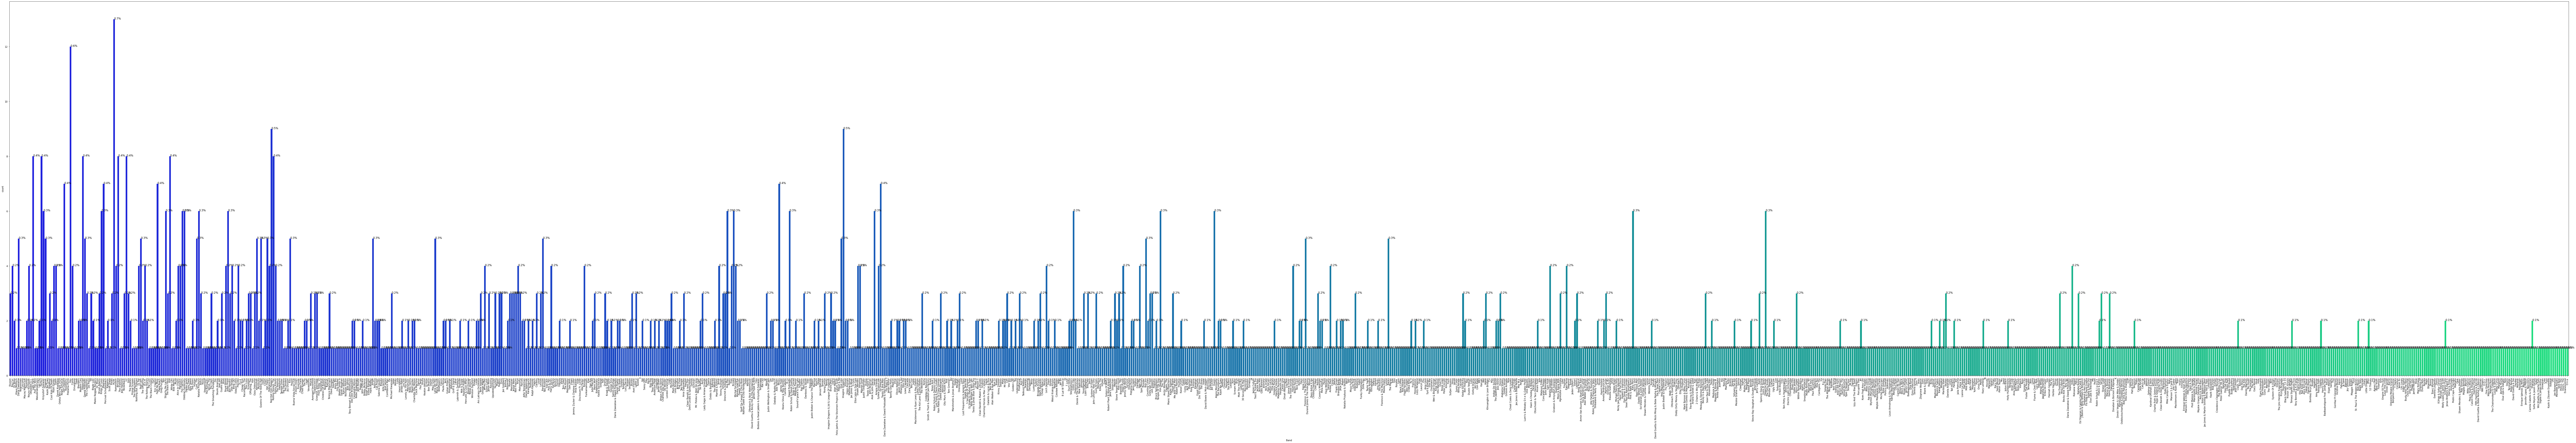

In [21]:
#Build barplot for Band
#click below charts to look better
plt.figure(figsize=(200,30))
ax = sns.countplot(df["Band"],palette='winter')
perc_on_bar(ax,df["Band"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


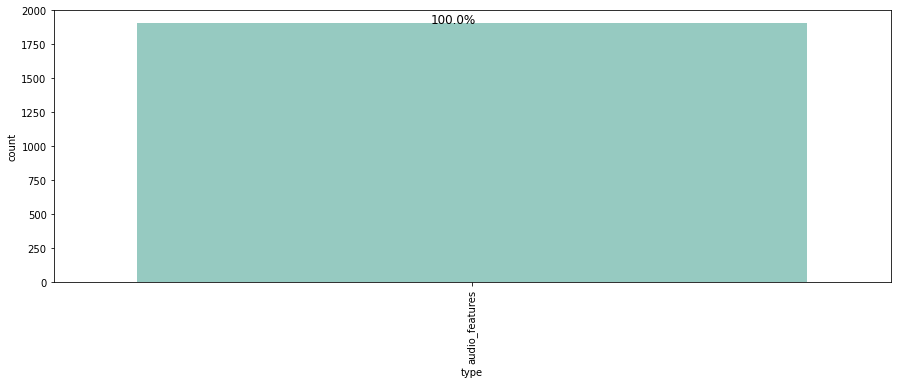

In [22]:
#Build barplot for type

plt.figure(figsize=(15,5))
ax = sns.countplot(df["type"],palette='Set3')
perc_on_bar(ax,df["type"])

**Box Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


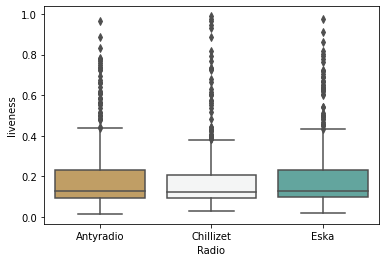

In [23]:
sns.boxplot(df["Radio"],df['liveness'],palette="BrBG")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


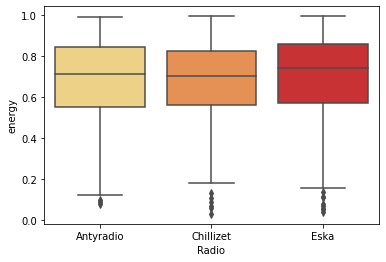

In [24]:
sns.boxplot(df["Radio"],df['energy'],palette="YlOrRd")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


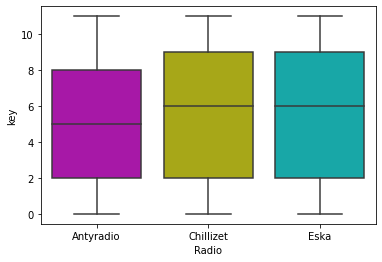

In [25]:
my_col = {"Antyradio": "m", "Chillizet": "y", "Eska":"c"}
sns.boxplot(df["Radio"],df['key'],palette=my_col)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


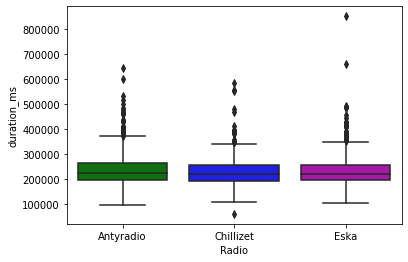

In [26]:
my_pal = {"Antyradio": "g", "Chillizet": "b", "Eska":"m"}
sns.boxplot(df["Radio"],df['duration_ms'],palette=my_pal)

**Scatter plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


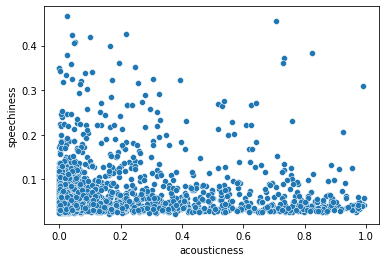

In [27]:
sns.scatterplot(df['acousticness'],df['speechiness'],palette='PuBu')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


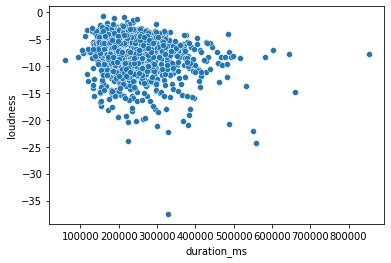

In [28]:
sns.scatterplot(df['duration_ms'],df['loudness'],palette='PuBu')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


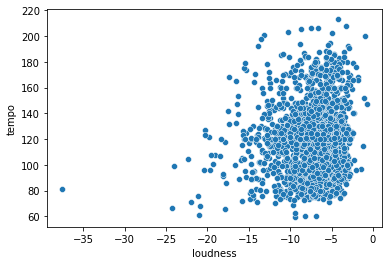

In [29]:
sns.scatterplot(df['loudness'],df['tempo'],palette='PuBu')

# **create, present and evaluate a classification model that will predict the station**

**Dependent and independent features**

In [31]:
X=df.drop(['Radio'],axis=1)
Y=df['Radio']

**Handle Categorical Features**

In [32]:
X=pd.get_dummies(X)

**Train Test split**

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("the shape of x_train",X_train.shape)
print("the shape of y_train",Y_train.shape)
print("the shape of x_test",X_test.shape)
print("the shape of y_test",Y_test.shape)

the shape of x_train (1431, 12968)
the shape of y_train (1431,)
the shape of x_test (477, 12968)
the shape of y_test (477,)


**Feature scaling**

In [34]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

**Random Forest **

In [35]:
model_RF=RandomForestClassifier()
model_RF.fit(X_train, Y_train)

RandomForestClassifier()

**Prediction**

In [36]:
# make prediction
pred_RF = model_RF.predict(X_test)

**Training and Testing Accuracy**

In [37]:


print("Training set score: {:.4f}".format(model_RF.score(X_train,Y_train)))

print("validation set score: {:.4f}".format(model_RF.score(X_test,Y_test)))

Training set score: 1.0000
validation set score: 0.7170


**Accuracy**

In [38]:
# calculate accuracy score
accuracy_score(Y_test, pred_RF)

0.7169811320754716

**Evaluation Metrics**

In [39]:
print("the precsion score is : ",precision_score(Y_test, pred_RF,average='weighted'))
print("the recall score is :",recall_score(Y_test, pred_RF,average='weighted'))
print("the f1 measure is ",f1_score(Y_test, pred_RF,average='weighted'))

the precsion score is :  0.730052653077178
the recall score is : 0.7169811320754716
the f1 measure is  0.7156611581388297


**Confusion Matrix**

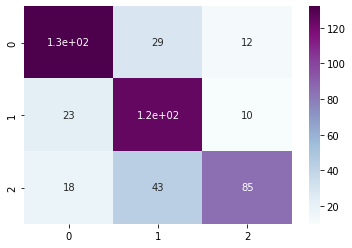

In [40]:
cm=confusion_matrix(Y_test, pred_RF)
sns.heatmap(cm,annot=True,cmap="BuPu")


**Boosting**

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

gradient_booster.fit(X_train,Y_train)

GradientBoostingClassifier()

**Prediction**

In [43]:
pred_boosting=gradient_booster.predict(X_test)

**Training and Testing Accuracy**

In [44]:


print("Training set score: {:.4f}".format(gradient_booster.score(X_train,Y_train)))

print("validation set score: {:.4f}".format(gradient_booster.score(X_test,Y_test)))

Training set score: 1.0000
validation set score: 0.9644


**Accuracy**

In [45]:
# calculate accuracy score
accuracy_score(Y_test, pred_boosting)

0.9643605870020965

**Evaluation Metrics**

In [46]:
print("the precsion score is : ",precision_score(Y_test, pred_boosting,average='weighted'))
print("the recall score is :",recall_score(Y_test, pred_boosting,average='weighted'))
print("the f1 measure is ",f1_score(Y_test, pred_boosting,average='weighted'))

the precsion score is :  0.9644696662732178
the recall score is : 0.9643605870020965
the f1 measure is  0.9643721716665693


**Confusion Matrix**

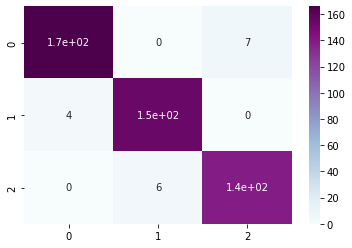

In [47]:
cm=confusion_matrix(Y_test, pred_boosting)
sns.heatmap(cm,annot=True,cmap="BuPu")

**create, present and evaluate a classification model that will predict the musical genre of the track**

**Dependent and Independent Features**

In [48]:
x=df.drop(['Music Genre'],axis=1)
y=df['Music Genre']

**Handle Categorical Features**

In [49]:
x=pd.get_dummies(x)

**Train Test Split**

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print("the shape of x_train",x_train.shape)
print("the shape of y_train",y_train.shape)
print("the shape of x_test",x_test.shape)
print("the shape of y_test",y_test.shape)

the shape of x_train (1431, 12626)
the shape of y_train (1431,)
the shape of x_test (477, 12626)
the shape of y_test (477,)


**Feature Scaling**

In [51]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

**Random Forest**

In [52]:
model_RF_2=RandomForestClassifier()
model_RF_2.fit(x_train, y_train)

RandomForestClassifier()

**prediction**

In [53]:
# make prediction
pred_RF_2 = model_RF_2.predict(x_test)

**Training and Testing Accuracy**

In [54]:


print("Training set score: {:.4f}".format(model_RF_2.score(x_train,y_train)))

print("validation set score: {:.4f}".format(model_RF_2.score(x_test,y_test)))

Training set score: 1.0000
validation set score: 0.2872


**Accuracy**

In [55]:
# calculate accuracy score
accuracy_score(y_test, pred_RF_2)

0.28721174004192873

**Evaluation Metrics**

In [56]:
print("the precsion score is : ",precision_score(y_test, pred_RF_2,average='weighted'))
print("the recall score is :",recall_score(y_test, pred_RF_2,average='weighted'))
print("the f1 measure is ",f1_score(y_test, pred_RF_2,average='weighted'))

the precsion score is :  0.3120441496064881
the recall score is : 0.28721174004192873
the f1 measure is  0.24451292102882294


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



**Confusion Matrix**

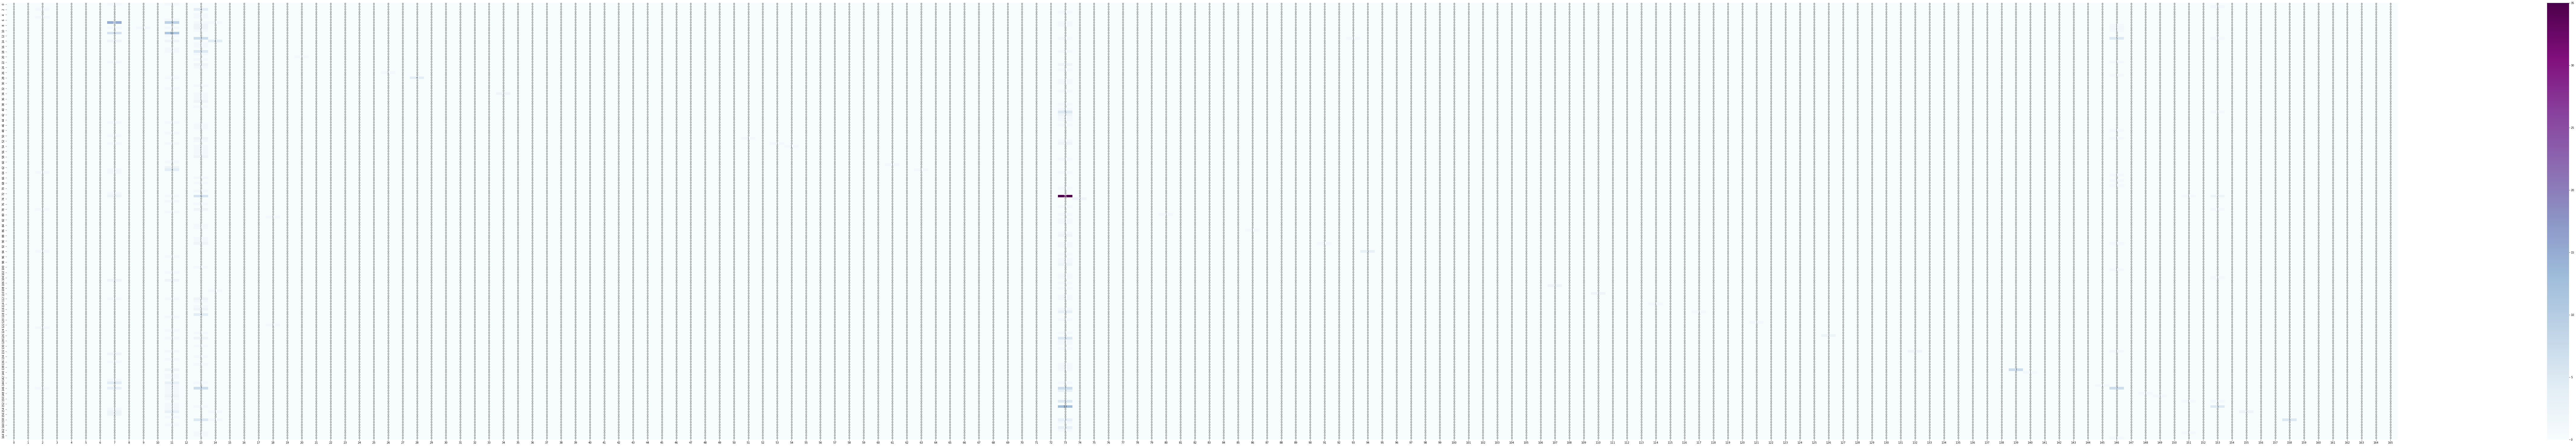

In [57]:
plt.figure(figsize=(200,30))
cm=confusion_matrix(y_test, pred_RF_2)
sns.heatmap(cm,annot=True,cmap="BuPu")

**Boosting**

In [58]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

gradient_booster.fit(x_train,y_train)

GradientBoostingClassifier()

**Prediction**

In [59]:
pred_boosting_2=gradient_booster.predict(x_test)

**Training and Testing Accuracy**

In [60]:


print("Training set score: {:.4f}".format(gradient_booster.score(x_train,y_train)))

print("validation set score: {:.4f}".format(gradient_booster.score(x_test,y_test)))

Training set score: 1.0000
validation set score: 0.3941


**Accuracy Score**

In [61]:
# calculate accuracy score
accuracy_score(y_test, pred_boosting_2)

0.3941299790356394

**Evaluation Metrics**

In [62]:
print("the precsion score is : ",precision_score(y_test, pred_boosting_2,average='weighted'))
print("the recall score is :",recall_score(y_test, pred_boosting_2,average='weighted'))
print("the f1 measure is ",f1_score(y_test, pred_boosting_2,average='weighted'))

the precsion score is :  0.521409112852182
the recall score is : 0.3941299790356394
the f1 measure is  0.37219895491447047


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



**Confusion matrix**

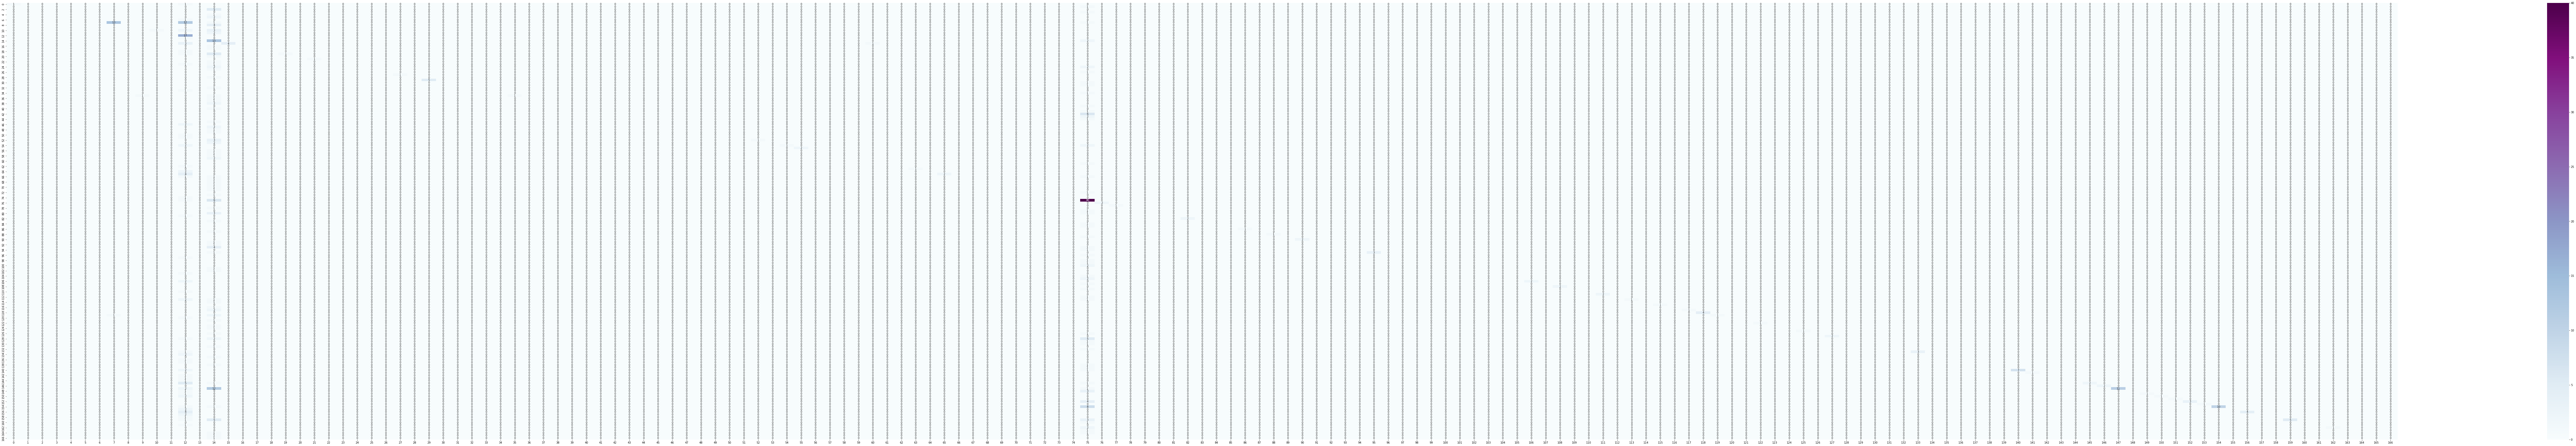

In [63]:
plt.figure(figsize=(200,30))
cm=confusion_matrix(y_test, pred_boosting_2)
sns.heatmap(cm,annot=True,cmap="BuPu")

# **wordcloud**


**Wordcloud on text columns**

In [64]:
df_1=pd.read_excel('/content/SongLyrics.xlsx')

In [65]:
from wordcloud import WordCloud

In [66]:
df_1.isna().sum()

Unnamed: 0       0
Title            0
text             0
translation    226
dtype: int64

In [67]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1318 non-null   int64 
 1   Title        1318 non-null   object
 2   text         1318 non-null   object
 3   translation  1092 non-null   object
dtypes: int64(1), object(3)
memory usage: 41.3+ KB


In [68]:
df_1=df_1.drop(['Unnamed: 0'],axis=1)

In [69]:
df_1

,Title,text,translation
0,Illusion-Nóż,"Bierze nóż, ten koleś bierze nóż Wychodzi noc...","He takes a knife, this guy takes the knife Com..."
1,Big Cyc-Ballada O Smutnym Skinie,"Skin jest całkiem łysy, włosków on nie nosi Gl...","Skin is tottaly bald, he doesn't wear hair. Ba..."
2,Dr Misio-Hipster,Na placu Zbawiciela zbawiciela w Warszawie są ...,NaN
3,Klaus Mitffoch-Jezu Jak Sie Ciesze,Jezu jak się cieszę Z tych króciutkich wskrzes...,"Jesus, I'm so glad Of these brief resurrection..."
4,Daria Zawialow-Lwy,"Wielkim haustem pijemy coś przypadkiem, To ch...",NaN
...,...,...,...
1313,Lanberry-Piątek,"Pod skórą czuję cię. I podświadomie wiem, Że m...",Under the skin I feel you Subconsciously I kno...
1314,Mateusz Ziółko-Szkło,Rozproszony wzrok nie dotarł wciąż Nie rozumie...,Scattered vision has not yet reached I do not ...
1315,Video-Będzie Piekło,1. Ulicy światła lśnią leniwie pada deszcz Obj...,1. The lights on the street are shining lazy a...
1316,Sheppard-Geronimo,Can you feel it? Now it's coming back We can s...,Czy czujesz to? Teraz to powraca Możemy to ukr...


In [70]:
text = " ".join(cat.split()[1] for cat in df_1.text)

In [71]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

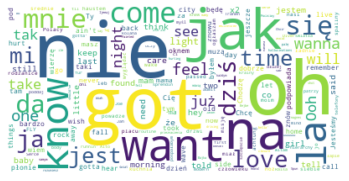

In [75]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Wordcloud on track name column of with genres data**

In [89]:
text = " ".join(cat.split()[1] for cat in df['Track name'])

In [90]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

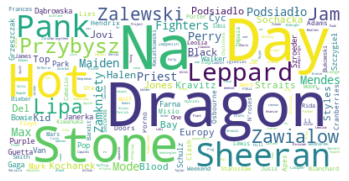

In [91]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Compare column C (track name) from 'with genres' file with column B (title) from 'song lyrics' file and from 'with genres' file take the Z column (music genre)**

In [76]:
df.columns

Index(['Indeks', 'Track name', 'Radio', 'Band', 'Track', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'Music Genre'],
      dtype='object')

In [78]:
df_1.columns

Index(['Title', 'text', 'translation'], dtype='object')

In [80]:
#none of  records of track name of with_genres data is equal to title of song lyrics dataset
df['Track name'].isin(df_1['Title']).value_counts()

False    1908
Name: Track name, dtype: int64

In [87]:
#none of  records of track name of with_genres data is equal to title of song lyrics dataset
df_1['Title'].isin(df['Music Genre']).value_counts()

False    1908
Name: Track name, dtype: int64